In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import autoreload  (for debugging external subroutines)
%load_ext autoreload
%autoreload 2

# subroutines needed, we also need kepcart.py
from orbsubs import *  
from outils import *
from scipy.signal import savgol_filter    

plt.rcParams.update({'font.size': 14})


### Binary simulation output plotting

In [2]:
# plot some stuff
def mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,rotMx,r_change, r_value,froot,ofilename):
    nvpanels = 6
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(5,12), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.12, right=0.99, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    ###########################
    il = 0;   # top
    smax = np.amax([np.amax(om1),np.amax(om2)])
    smin = np.amin([np.amin(om1),np.amin(om2)])
    axarr[il].set_ylim(smin,smax)
    axarr[il].plot(tarr,om1,'.',color='black',\
                   ms=2,label='prim')
    axarr[il].plot(tarr,om2,'.',color='blue',\
                   ms=2,label='sec')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    for j in range(1,7):
        axarr[il].plot(tarr,mm_smo*j,':',color='brown',lw=1,alpha=0.5)
    for j in range(0,7):
        axarr[il].plot(tarr,mm_smo*(j+0.5),':',color='purple',lw=1,alpha=0.5)
        
    axarr[il].set_ylabel('spin')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 1;
    axarr[il].plot(tarr,obliquity_deg1,'.',color='red',\
                   ms=2,label='prim')
    axarr[il].plot(tarr,obliquity_deg2,'.',color='darkorange',\
                   ms=2,label='sec')
    axarr[il].set_ylabel('ob liquity (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    
    ##########################
    il = 2;
    amax = max(aaarr)
    amin = min(aaarr)
    if (amax > 5):
        axarr[il].set_ylim(max(amin,0),5)
    axarr[il].plot(tarr,aaarr,'.',color='green',ms=2)
    axarr[il].set_ylabel('semi-major')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ########################## 
    il = 3;
    emax = max(eearr)
    emin = min(eearr)
    if (emax > 1):
        axarr[il].set_ylim(0,1)
    axarr[il].plot(tarr,eearr,'.',color='cyan',ms=2)
    axarr[il].set_ylabel('eccentricity')
    il = nvpanels-1;
    axarr[il].set_xlabel('time')
    if (len(ofilename)>3):
        plt.savefig(ofilename)
        
     ########################## 
    il = 4;
    rc_max = max(r_change)
    rc_min = min(r_change)
    if (rc_max > 1):
        axarr[il].set_ylim(0,rc_max)
    axarr[il].plot(tarr,r_change,'.',color='cyan',ms=2)
    axarr[il].set_ylabel('Change in rotation in x')
    il = nvpanels-1;
    axarr[il].set_xlabel('time')
    if (len(ofilename)>3):
        plt.savefig(ofilename)   
        
         ########################## 
    il = 5;
    r_max = max(r_value)
    r_min = min(r_value)
    if (r_max > 1):
        axarr[il].set_ylim(0,r_max)
    axarr[il].plot(tarr,r_value,'.',color='cyan',ms=2)
    axarr[il].set_ylabel('rotation in x')
    il = nvpanels-1;
    axarr[il].set_xlabel('time')
    if (len(ofilename)>3):
        plt.savefig(ofilename)
    

In [3]:
# global information needed!
simdir = "../bin3/" # where simulation output files are found
   
m1 = 1.0;  # masses of the two bodies!  Globals!
m2 = 0.01;  #  lower mass secondary
GM = m1+m2 # G=1


../bin3/a1_ext_1.txt
../bin3/a1_ext_2.txt


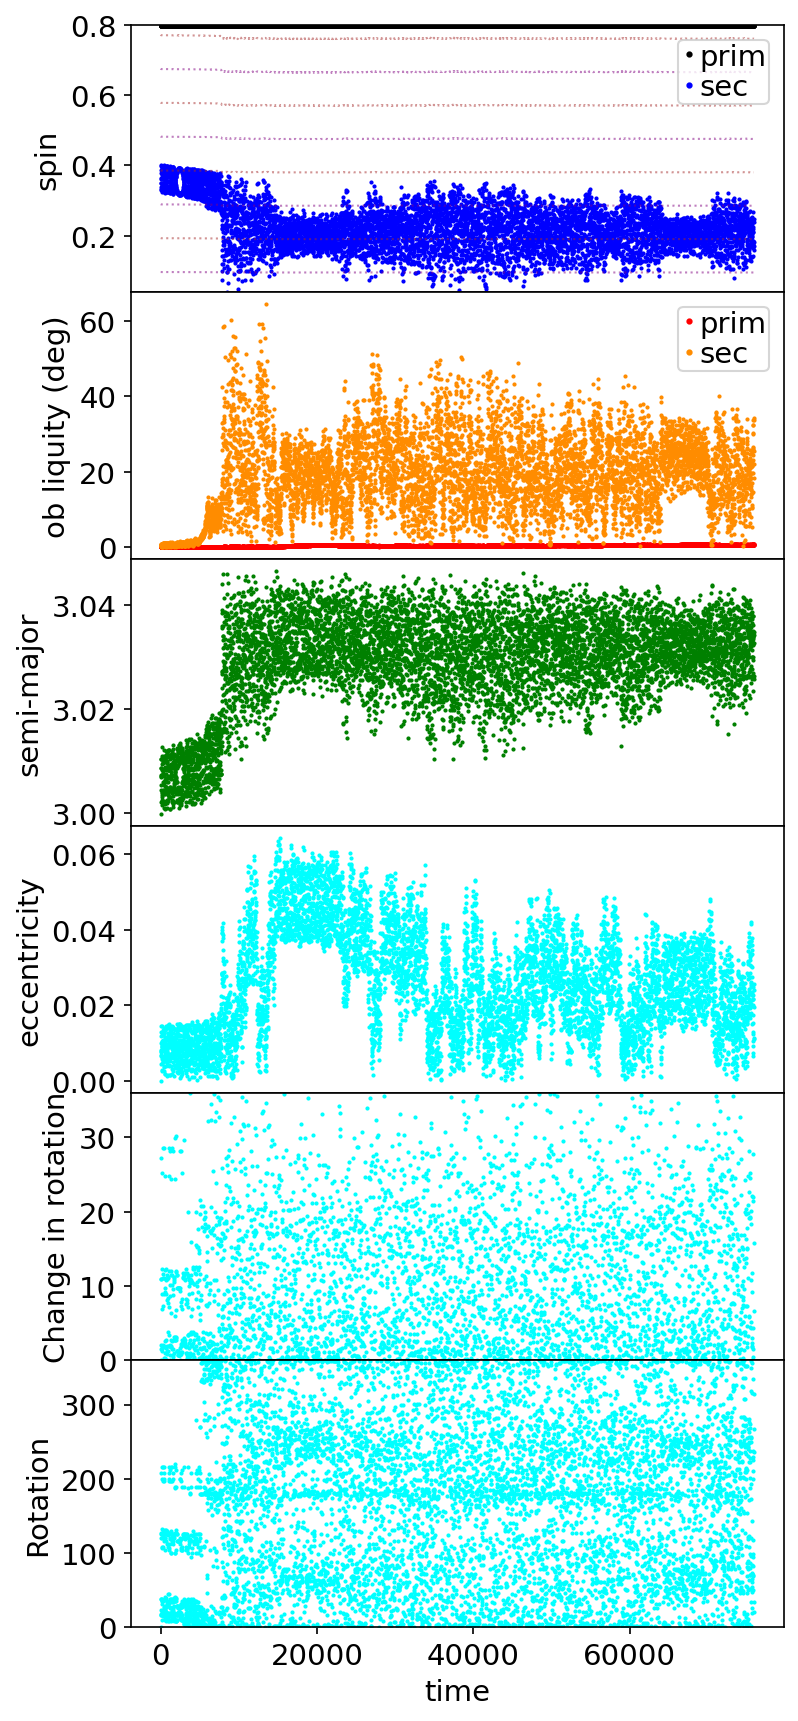

In [4]:
# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value,froot,ofilename)

In [5]:
# convenient as lets us measure tidal drift from the beginning of the simulation

In [6]:
# global information needed!
simdir = "../bin2/" # where simulation output files are found
froot = 'a1'  # spin up starting tidally locked
   
m1 = 1.0;  # masses of the two bodies!  Globals!
m2 = 0.01;  #  lower mass secondary
GM = m1+m2 # G=1


../bin2/a3_ext_1.txt
../bin2/a3_ext_2.txt


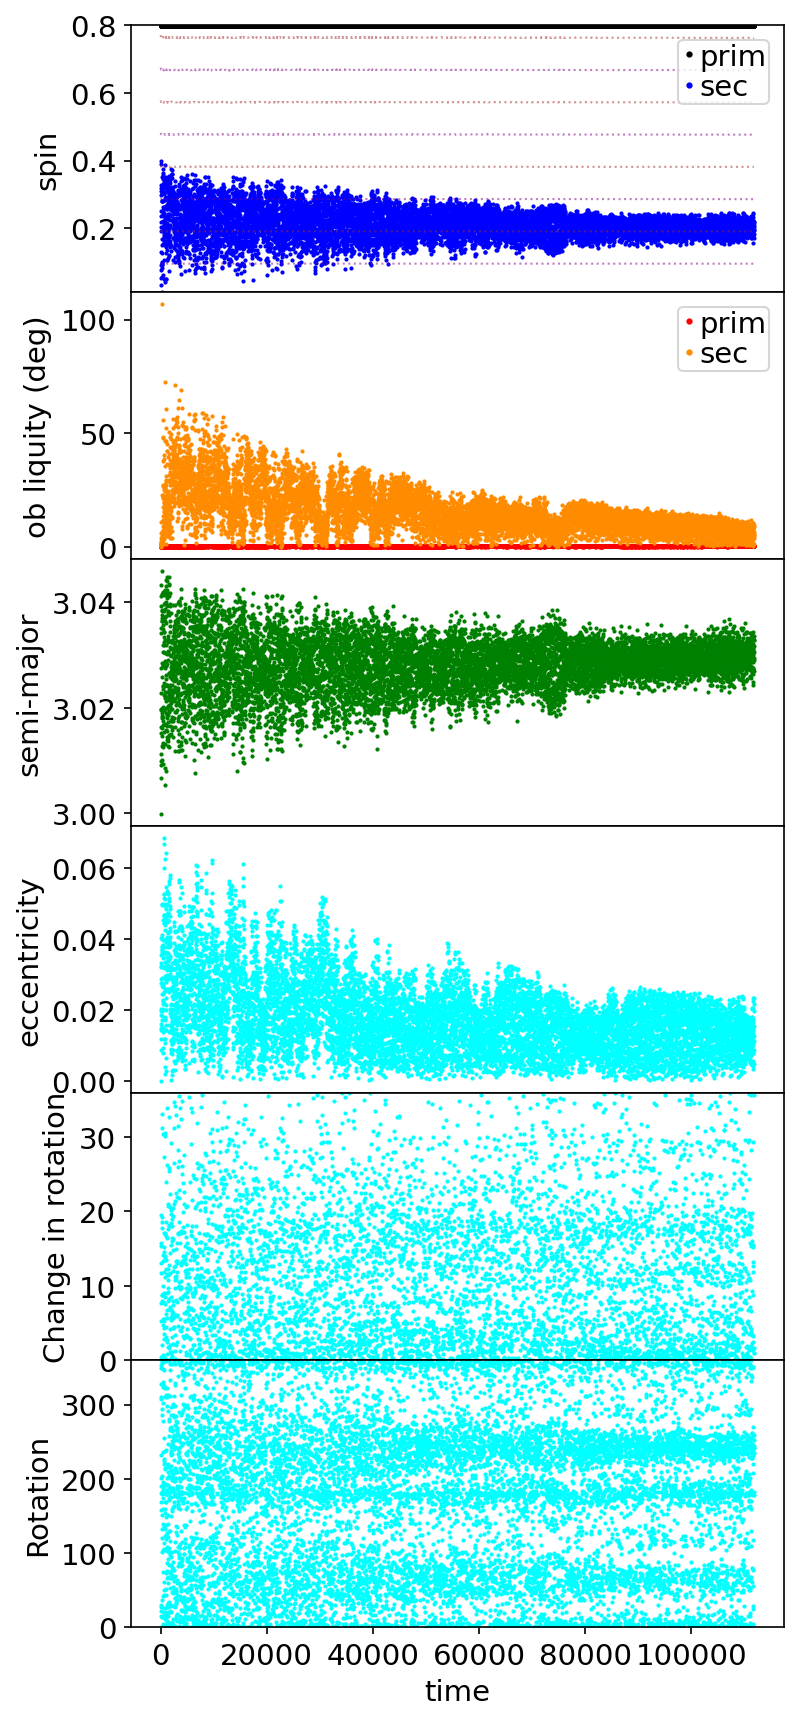

In [7]:
# read in orbital elements, spins for both resolved bodies
froot = 'a3'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value,froot,ofilename)

../bin2/a2_ext_1.txt
../bin2/a2_ext_2.txt


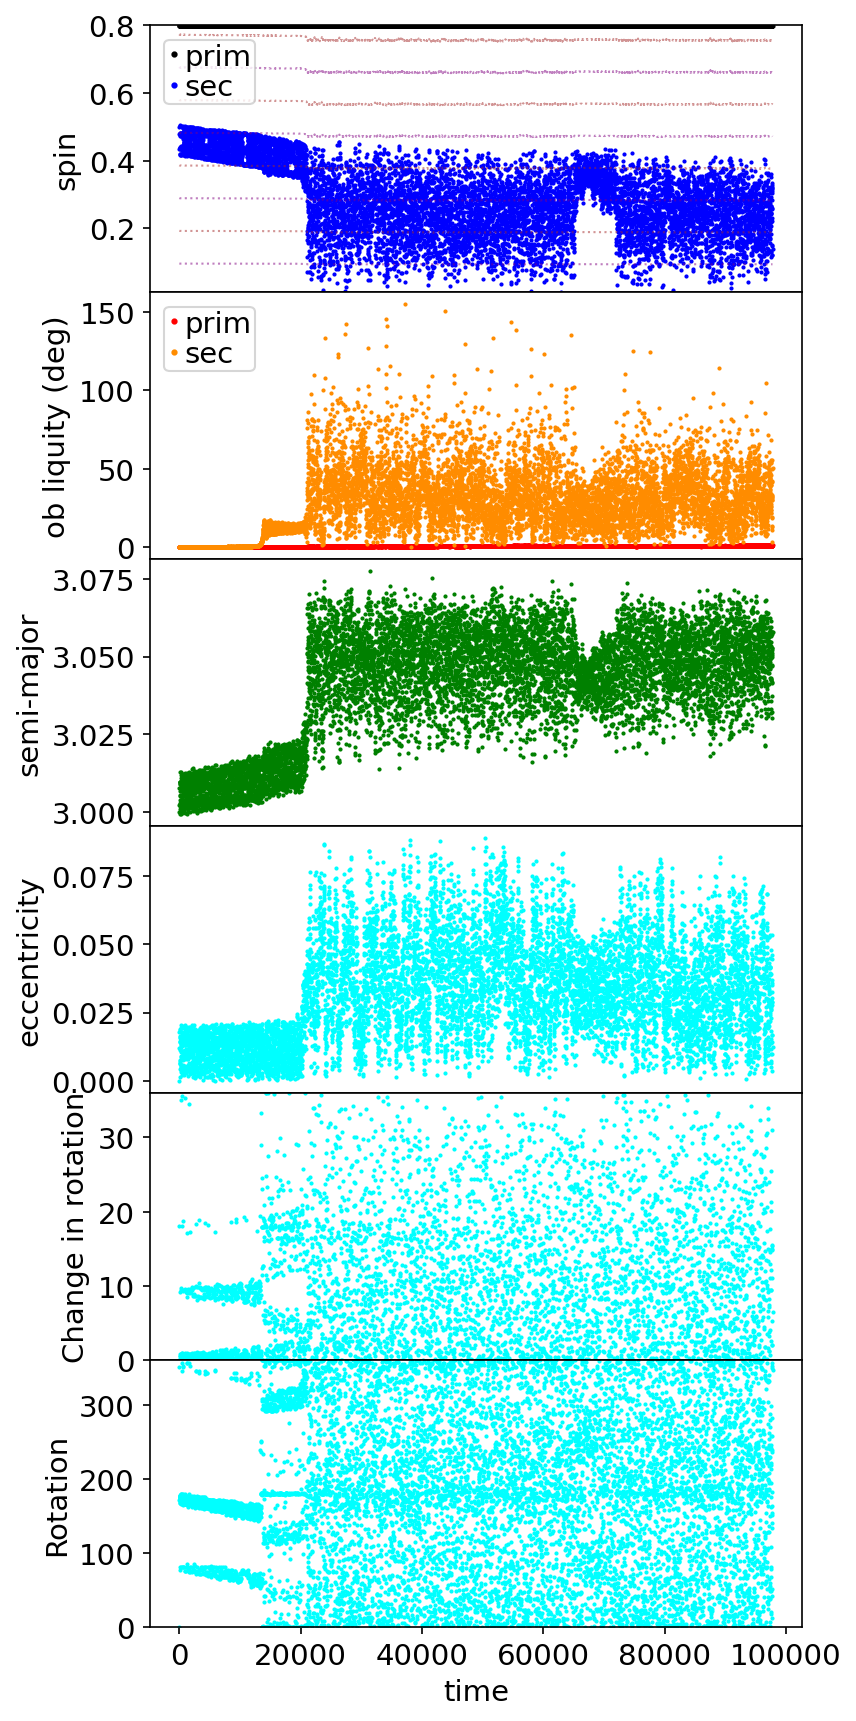

In [8]:
# read in orbital elements, spins for both resolved bodies
froot = 'a2'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value,froot,ofilename)

../bin2/a1_ext_1.txt
../bin2/a1_ext_2.txt


/Users/anthonylabarca/OneDrive - University of Rochester/Research/Summer2021/V2/asteroid_binary/myexamples/pylab/orbsubs.py:124: RuntimeWarning: invalid value encountered in power
  meanmotion = np.sqrt(GM)/aaarr**1.5


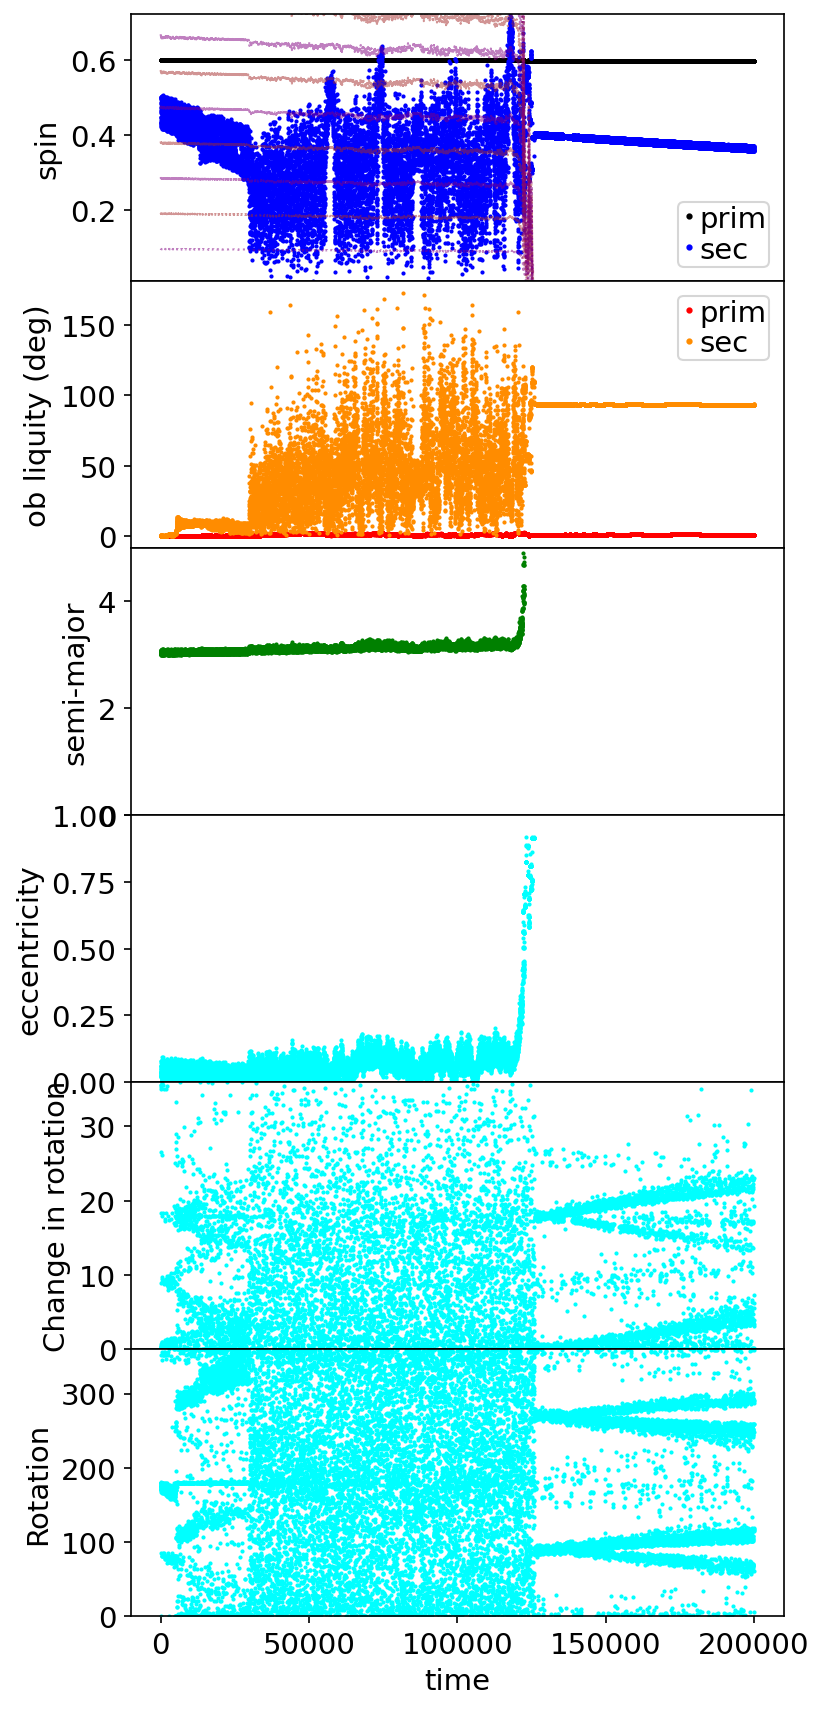

In [9]:
# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion, rotMx, r_change,r_value,froot,ofilename)